In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(1123)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')

from decodanda import Decodanda, generate_synthetic_data, visualize_synthetic_data



### First example: neurons respond to one variable
In this example, we have a simple scenario where neurons respond to a single binary variable that can take two values. We will try to decode these two values from neural activity.
In this toy example, we record two variables, ```stimulus``` and ```action```, but only one of them (```stimulus```) is represented in the neural response.


data["raster"]:
 [[ 0.  9.  0. ...  1.  0.  2.]
 [ 0.  8.  0. ...  3.  1.  0.]
 [ 0. 12.  1. ...  2.  2.  0.]
 ...
 [ 0. 12.  1. ...  1.  0.  4.]
 [ 0. 11.  0. ...  0.  1.  4.]
 [ 0.  6.  0. ...  0.  0.  1.]]
data["trial"]:
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25

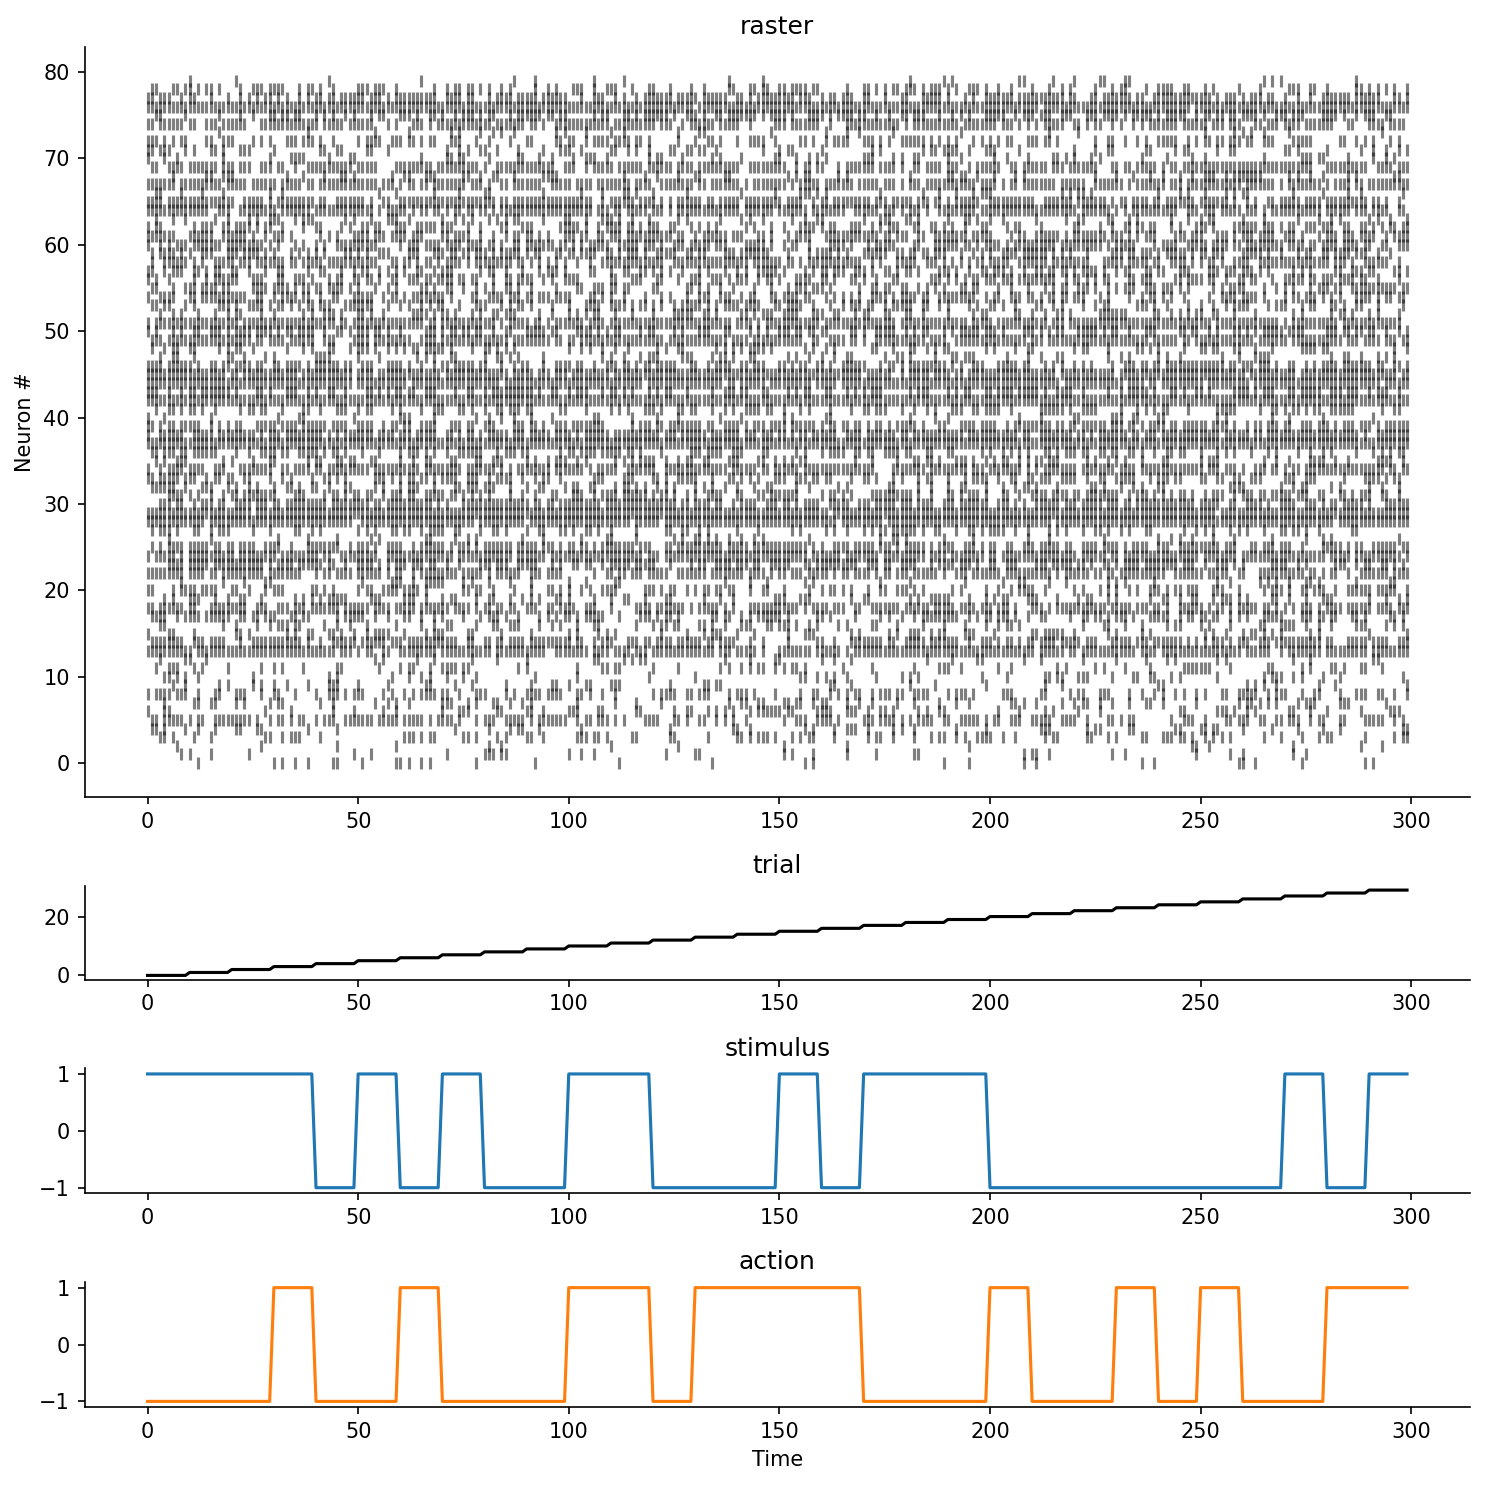

In [8]:
# let's create some data that responds to a binary variable

data = generate_synthetic_data(n_neurons=80, n_trials=30, keyA='stimulus', keyB='action', rateA=0.1, rateB=0, meanfr=0.05)
visualize_synthetic_data(data)

print('data["raster"]:\n', data['raster'])
print('data["trial"]:\n', data['trial'])
print('data["stimulus"]:\n', data['stimulus'])


In [9]:
# Create a decodanda object by applying these conditions to the data

conditions = {'stimulus': [-1, 1]}     # The conditions dictionary takes a simple one-variable structure.
# variable name^     values^

mydec = Decodanda(data=data,
                  conditions=conditions,
                  verbose=True)

		[Decodanda]	building conditioned rasters for session 0
			(stimulus = -1):	Selected 160 time bin out of 300, divided into 16 trials 
			(stimulus = 1):	Selected 140 time bin out of 300, divided into 14 trials 




#### The decode() method

  0%|          | 0/25 [00:00<?, ?it/s]


Testing decoding performance for semantic dichotomy:  stimulus

[decode_dichotomy]	Decoding - 160 time bins - 80 neurons - 1 brains
		(1)
			vs.
		(-1)

Looping over decoding cross validation folds:

[decode_with_nullmodel]	 data <p> = 0.78

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 25/25 [00:02<00:00, 11.32it/s]


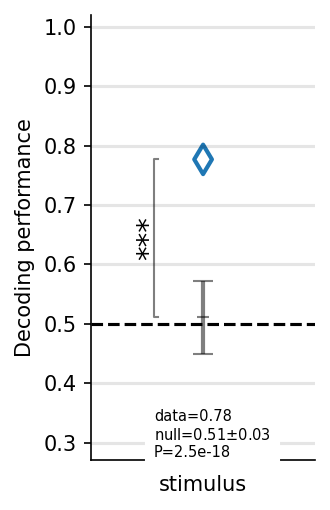

In [11]:
decoding_params = {
    'training_fraction': 0.7,       # fraction of trials used for training during cross validation
    'cross_validations': 10,        # number of different training-testing separations
    'nshuffles': 25,                # number of null model repetitions to compute significance
    'plot': True,                   # this generates a recap plot with performance, null model bars, and significance
}

data, null = mydec.decode(**decoding_params)



  0%|          | 0/25 [00:00<?, ?it/s]


Testing decoding performance for semantic dichotomy:  stimulus

[decode_dichotomy]	Decoding - 160 time bins - 80 neurons - 1 brains
		(1)
			vs.
		(-1)

Looping over decoding cross validation folds:

[decode_with_nullmodel]	 data <p> = 0.78

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 25/25 [00:02<00:00,  9.93it/s]


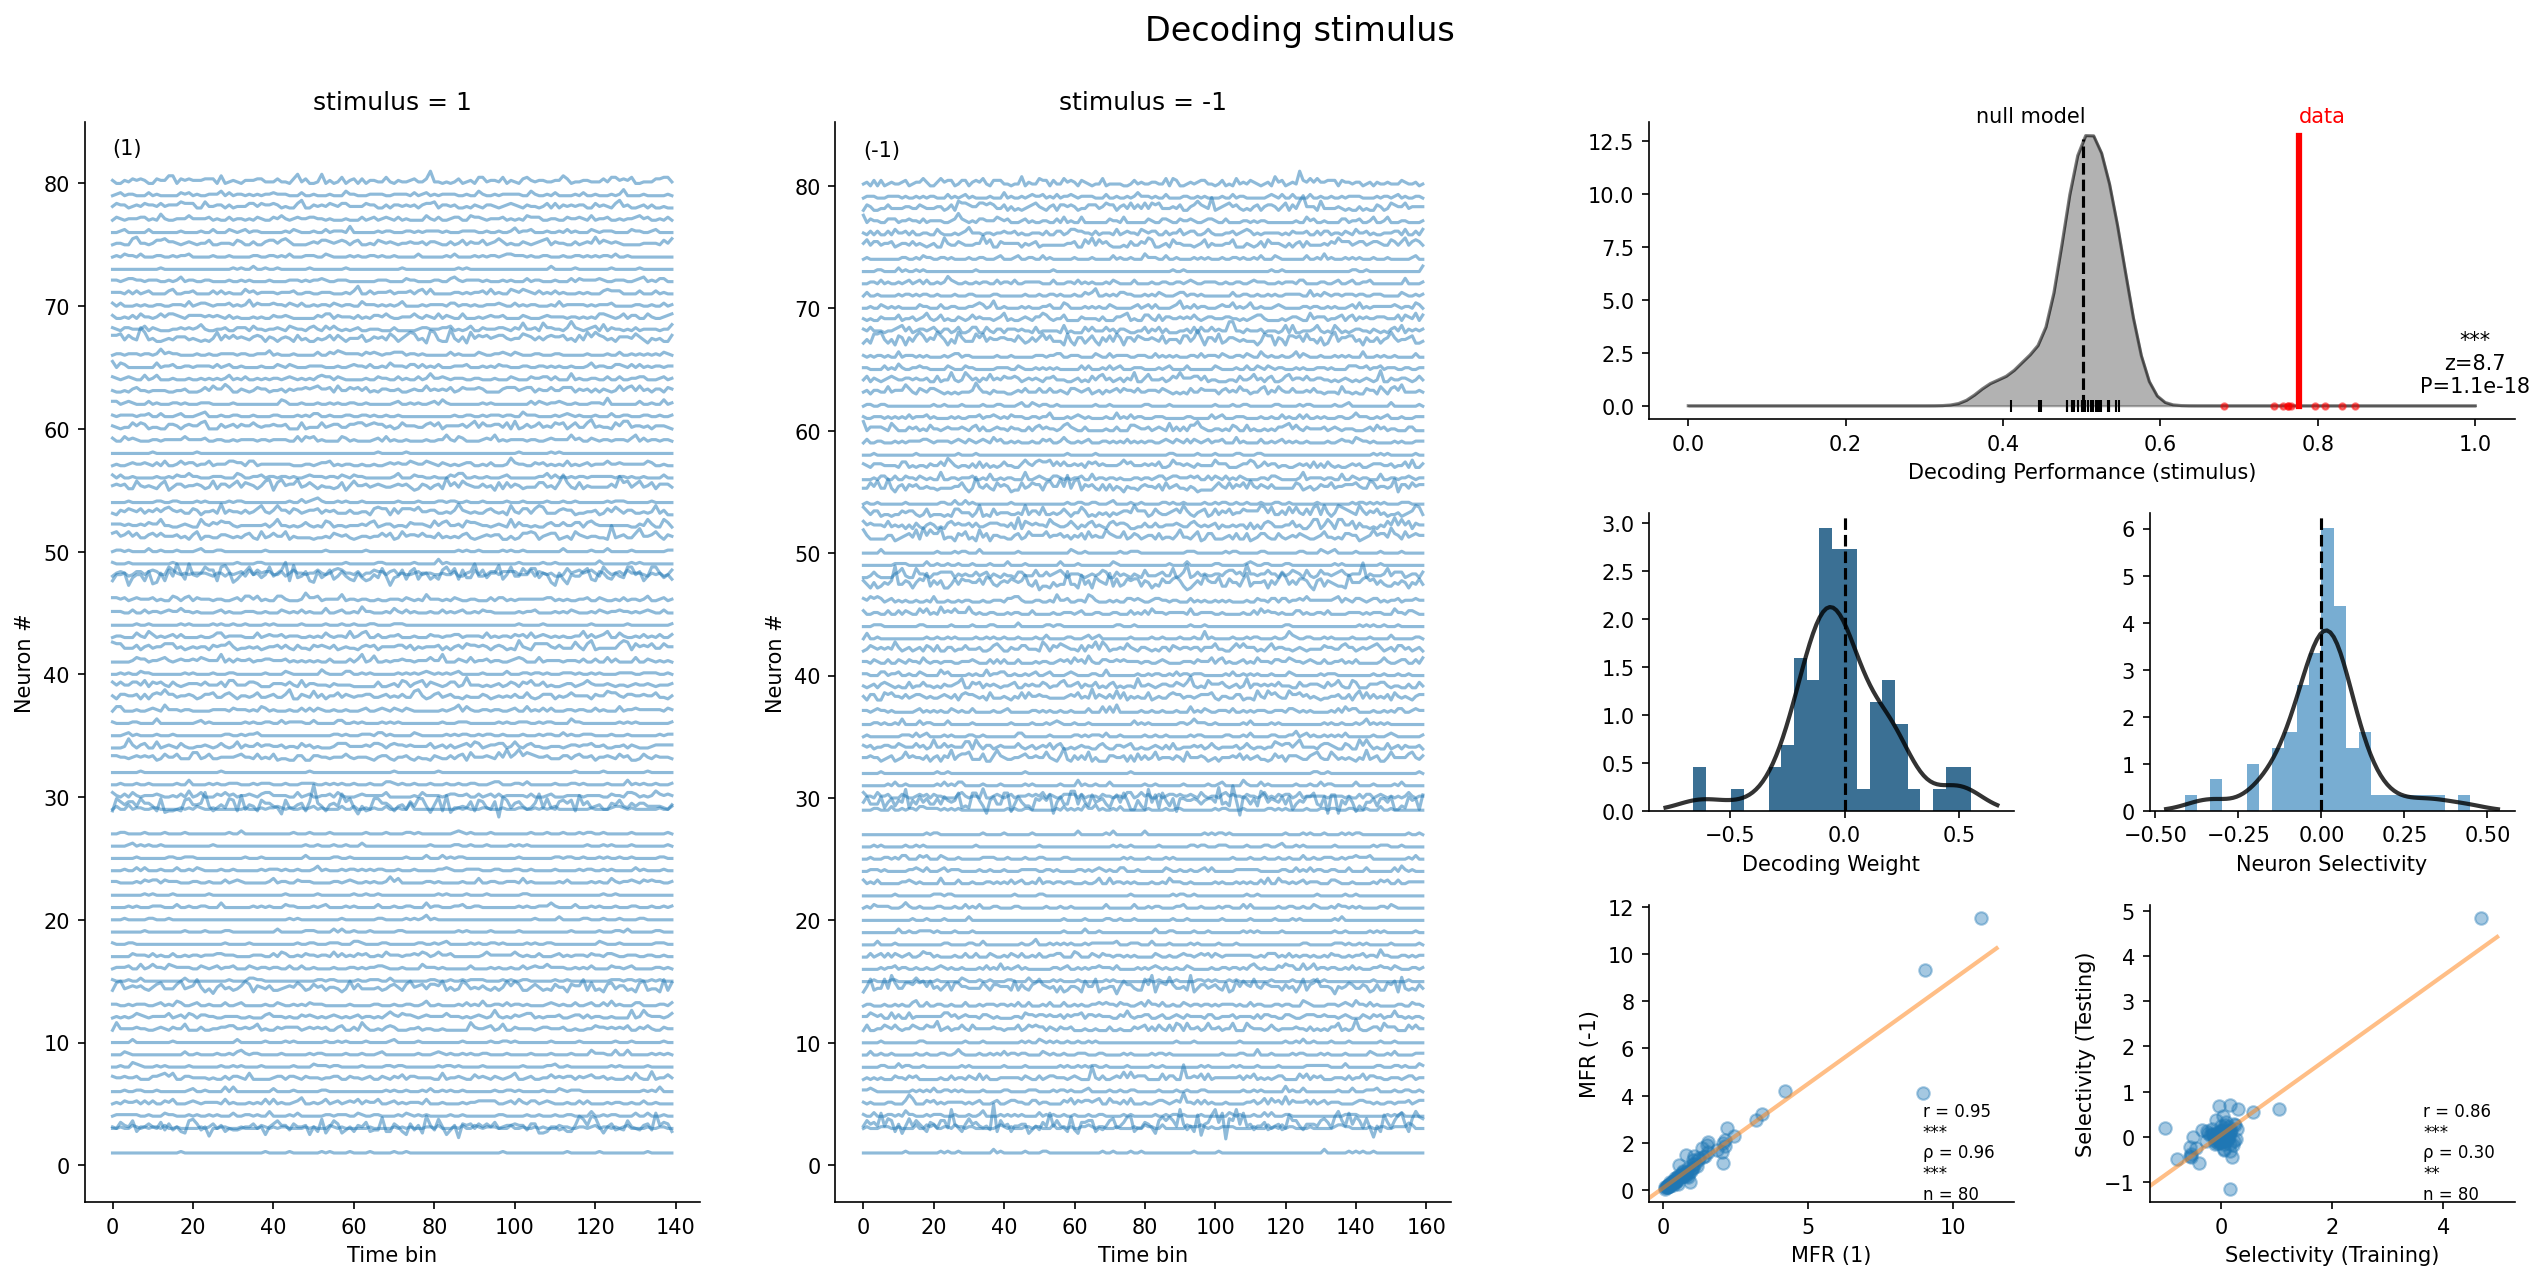

In [12]:
# with the key plot_all=True we can inspect the details of the analysis

decoding_params['plot_all'] = True
decoding_params['plot'] = False
data, null = mydec.decode(**decoding_params)